<a href="https://colab.research.google.com/github/prerak-26/prerak-26/blob/main/Assignment_1_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #numpy library to work with arrays
import matplotlib.pyplot as plt #used to plot image
from skimage import feature # This pacakge is used for LBP feature extraction
from sklearn import svm # This pacakge is used for svm classification
from sklearn import metrics #for accuracy
from sklearn.metrics import accuracy_score  #for calculating accuracy
%matplotlib inline
import cv2  #openCV for image functions
import os #os to fetch files from system directory
import seaborn as sns #for plotting confusion matrix
from sklearn.model_selection import train_test_split  #for splitting data in train and test data
from sklearn.svm import SVC #to train svm model

Connect with the drive

In [52]:
from google.colab import drive # connect with the drive for dataset
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
cd /content/gdrive/MyDrive/42028/Assignment-1

/content/gdrive/MyDrive/42028/Assignment-1


In [53]:
!ls #ls used to list all directories

-  alpha		   beta				    leq  neq   sum
]  Assignment-1_SVM.ipynb  dataset_42028assg1_24590200.zip  log  sqrt  theta


Unzip the dataset

In [ ]:
!unzip dataset_42028assg1_24590200.zip

Streaming output truncated to the last 5000 lines.
  inflating: theta/theta_33381.jpg   
  inflating: theta/exp73930.jpg      
  inflating: theta/exp44907.jpg      
  inflating: theta/exp24359.jpg      
  inflating: theta/exp14498.jpg      
  inflating: theta/exp32143.jpg      
  inflating: theta/exp49938.jpg      
  inflating: theta/exp32142.jpg      
  inflating: theta/exp24635.jpg      
  inflating: theta/theta_23084.jpg   
  inflating: theta/exp34830.jpg      
  inflating: theta/exp2209.jpg       
  inflating: theta/theta_36454.jpg   
  inflating: theta/theta_10705.jpg   
  inflating: theta/exp35093.jpg      
  inflating: theta/exp32371.jpg      
  inflating: theta/exp35886.jpg      
  inflating: theta/exp16673.jpg      
  inflating: theta/theta_33159.jpg   
  inflating: theta/theta_14495.jpg   
  inflating: theta/exp22434.jpg      
  inflating: theta/theta_36110.jpg   
  inflating: theta/theta_27420.jpg   
  inflating: theta/theta_36632.jpg   
  inflating: theta/exp40080.jpg      

In [5]:
# assigning dataset path to a variable
dir_path = '/content/gdrive/MyDrive/42028/Assignment-1'

In [6]:
# Creating an array which contains all the different symbols that need to classify.
symbols = ['-',']','alpha','beta','leq','log','neq','sqrt','sum','theta']

The first step is creating an array which contains all the images along with it's corsponded labels. Images and labels are being seprated in this step.

In [54]:
img_data_arr = [] # img array that contains all the images from all the folders
labels_arr = [] # used for storing symbols
for symbol in symbols:
  print("Running symbol : ",symbol)
  path = os.path.join(dir_path,symbol)
  for image in os.listdir(path):
    image_arr = cv2.imread(os.path.join(path,image),cv2.COLOR_BGR2GRAY)
    img_data_arr.append(image_arr.flatten()) #flatten method is used to convert an nD array into 1D
    labels_arr.append(symbols.index(symbol))
  print("Symbol",symbol," has been loaded successfully")

img_data_arr = np.array(img_data_arr) # Image array
labels_arr = np.array(labels_arr) # Symbol array

print(img_data_arr.shape)

Running symbol :  -
Symbol -  has been loaded successfully
Running symbol :  ]
Symbol ]  has been loaded successfully
Running symbol :  alpha
Symbol alpha  has been loaded successfully
Running symbol :  beta
Symbol beta  has been loaded successfully
Running symbol :  leq
Symbol leq  has been loaded successfully
Running symbol :  log
Symbol log  has been loaded successfully
Running symbol :  neq
Symbol neq  has been loaded successfully
Running symbol :  sqrt
Symbol sqrt  has been loaded successfully
Running symbol :  sum
Symbol sum  has been loaded successfully
Running symbol :  theta
Symbol theta  has been loaded successfully
(5000, 2025)


In [55]:
labels_arr.shape # 5000 images hence, 5000 labels

(5000,)

In [9]:
labels_arr[1000]

2

Displaying all symbol's one image to check images and labels are loaded successfully

-
]
alpha
beta
leq
log
neq
sqrt
sum
theta


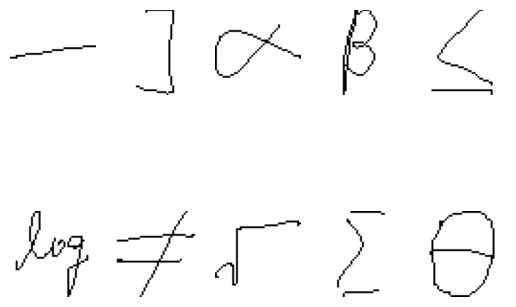

In [57]:
img_index = 1 # 5000 images for total 10 symbols. 500 images of each symbol. Img index 1 is indicating first symbol's img.
fig = plt.figure()
ax1 = fig.add_subplot(2,5,1) # ploting images into 2 rows and 5 columns; this image shows at row 1 and column 1
ax1.axis('off')
ax1.imshow(img_data_arr[img_index].reshape(45,45),cmap='gray') # imshow() method display the image with parameter : reshape converts image into 2D 45x45, cmap = "gray" is used to display grayscale image
print(symbols[labels_arr[img_index]]) # display symbol of the image

ax2 = fig.add_subplot(2,5,2) # row 1 column 2
ax2.axis('off')
img_index = 700 # index 700 belongs to second symbol's img; As 500 images for each symbol just add 500 to the last img index to get the new symbol's image
ax2.imshow(img_data_arr[img_index].reshape(45,45),cmap='gray')
print(symbols[labels_arr[img_index]])

ax3 = fig.add_subplot(2,5,3) # row 1 column 3
ax3.axis('off')
img_index = 1200 # third symbol
ax3.imshow(img_data_arr[img_index].reshape(45,45),cmap='gray')
print(symbols[labels_arr[img_index]])

ax4 = fig.add_subplot(2,5,4) # row 1 column 4
ax4.axis('off')
img_index = 1700 # fourth symbol
ax4.imshow(img_data_arr[img_index].reshape(45,45),cmap='gray')
print(symbols[labels_arr[img_index]])

ax5 = fig.add_subplot(2,5,5) # row 1 column 5
ax5.axis('off')
img_index = 2200 # fifth symbol
ax5.imshow(img_data_arr[img_index].reshape(45,45),cmap='gray')
print(symbols[labels_arr[img_index]])

ax6 = fig.add_subplot(2,5,6) # row 2 column 1
ax6.axis('off')
img_index = 2700 # sixth symbol
ax6.imshow(img_data_arr[img_index].reshape(45,45),cmap='gray')
print(symbols[labels_arr[img_index]])

ax7 = fig.add_subplot(2,5,7) # row 2 column 2
ax7.axis('off')
img_index = 3200 # seventh symbol
ax7.imshow(img_data_arr[img_index].reshape(45,45),cmap='gray')
print(symbols[labels_arr[img_index]])

ax8 = fig.add_subplot(2,5,8) # row 2 column 3
ax8.axis('off')
img_index = 3700 # eighth symbol
ax8.imshow(img_data_arr[img_index].reshape(45,45),cmap='gray')
print(symbols[labels_arr[img_index]])

ax9 = fig.add_subplot(2,5,9) # row 2 column 4
ax9.axis('off')
img_index = 4200 # ninth symbol
ax9.imshow(img_data_arr[img_index].reshape(45,45),cmap='gray')
print(symbols[labels_arr[img_index]])

ax10 = fig.add_subplot(2,5,10) # row 2 column 5
ax10.axis('off')
img_index = 4700 #tenth symbol
ax10.imshow(img_data_arr[img_index].reshape(45,45),cmap='gray')
print(symbols[labels_arr[img_index]])

Spliting dataset into training and testing. 70% for training and 30% for testing

In [70]:
img_train_data, img_test_data, label_train_data, label_test_data = train_test_split(img_data_arr,labels_arr,test_size=0.3, random_state=42) # random_state is used to generate the same result across every execution; 0 and 42 is most used value for this hyperparameter

In [71]:
img_train_data.shape

(3500, 2025)

In [72]:
label_train_data.shape

(3500,)

Normalization is used to conver the pixels value from 0 to 1;
It is used to simplify mathematical execution

In [73]:
img_train_data = img_train_data/255
img_test_data = img_test_data/255

# Row Pixels

In [74]:
model = svm.SVC(kernel='rbf',C=100,gamma='auto',probability=True,random_state=42) # Training SVM classifer with rbf kernel
model.fit(img_train_data,label_train_data) # passing traing dataset to train the SVM classifier; traing image dataset and training symbol dataset

SVC(C=100, gamma='auto', probability=True, random_state=42)

In [75]:
print("training accuracy with raw pixels:",model.score(img_train_data,label_train_data))

training accuracy with raw pixels: 1.0


In [76]:
symbol_pred = model.predict(img_test_data) # predicting the symbol for images of image test data

In [78]:
accuracy = metrics.accuracy_score(label_test_data,symbol_pred) # checking the accuracy of predicted symbol by comparing predict symbol with actual
print("Prediction accuracy :",accuracy)

Prediction accuracy : 0.9833333333333333


[[163   0   0   0   0   0   0   1   0   0]
 [  0 152   0   0   0   0   0   0   0   0]
 [  0   0 148   0   6   0   0   1   0   0]
 [  0   0   0 152   0   0   0   0   0   2]
 [  0   0   0   0 142   0   0   0   1   0]
 [  0   0   0   0   0 140   1   0   0   0]
 [  0   0   0   0   0   0 143   0   0   0]
 [  0   0   1   2   0   0   0 155   0   0]
 [  0   0   1   0   2   0   0   0 129   0]
 [  0   0   4   0   1   1   0   0   1 151]]


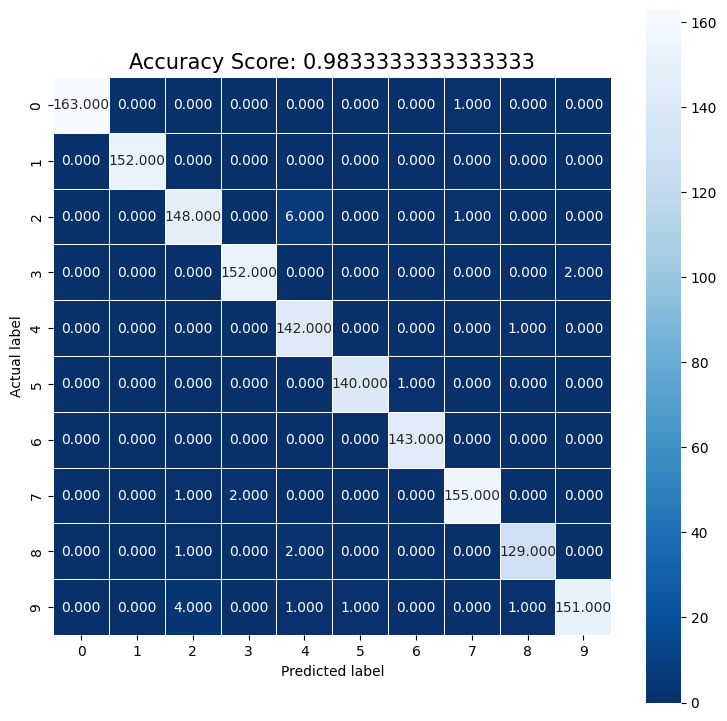

In [79]:
cm  = metrics.confusion_matrix(label_test_data,symbol_pred)
print(cm)
#Seaborn library is used to plot confusion matrix
plt.figure(figsize=(9,9))
# heatmap shows how many images classified correct or wrong with actual symbol and predicted symbol for all the symbols
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

**LBP & HOG**

Reshape the image dataset

In [82]:
img_train_data = img_train_data.reshape(-1,45,45) # reshape converts images into hight and width and its required to extract the featurs using LBP and HOG
img_test_data = img_test_data.reshape(-1,45,45)
img_test_data.shape


(1500, 45, 45)

# LBP

In [84]:
class LocalBinaryPatterns:
  def __init__(self, numPoints, radius):
    #store radius and number of points
    self.numPoints = numPoints
    self.radius = radius

  def LBPfeaturesExtractor(self, image, eps=1e-7):
    #compute the LBP representation of the image and then use to it build histogram of patterns
    #redius is define the range of circle across the central pixel
    lbp = feature.local_binary_pattern(image, self.numPoints, self.radius, method="uniform")
    #forming a histogram of pattern
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0,self.numPoints+3),
                             range=(0,self.numPoints+2))
    #normalization of histogram
    hist = hist.astype("float")
    hist /= (hist.sum()+eps)

    return hist #returing the histogram

In [85]:
desc = LocalBinaryPatterns(24,8) # object creation of LBP class with initializing parameter 24 as numPoints and 8 as redius
img_feature_train = []
symbol_train = [] #symbols for each image

for image_index in range(len(img_train_data)): # running a loop for all images in training dataset
  image = (img_train_data[image_index]) # loading one by one image
  hist = desc.LBPfeaturesExtractor(image) # passing that image to LBP feature extractor method to extract the feature of the image
  symbol_train.append(label_train_data[image_index]) # using the index collecting the symbol of that image and append it to the symbol_train array
  img_feature_train.append(hist) # appending extracted features of each images

In [86]:
np.sum(img_feature_train)

3499.9999998271605

In [87]:
hist

array([0.        , 0.        , 0.        , 0.        , 0.00148148,
       0.00740741, 0.00395062, 0.01777778, 0.0162963 , 0.02123457,
       0.00888889, 0.01037037, 0.00790123, 0.09530864, 0.00938272,
       0.02814815, 0.01135802, 0.04790123, 0.01135802, 0.02074074,
       0.01580247, 0.02617284, 0.01382716, 0.01679012, 0.09530864,
       0.51259259])

**Train SVM Classifier using the training dataset**

In [88]:
model = svm.SVC(kernel='rbf',C=100,gamma='auto',probability=True,random_state=42) #training a SVM classifier with training data
model.fit(img_feature_train,symbol_train) # passing the extracted featuters of the training dataset images and symbol to train SVM

SVC(C=100, gamma='auto', probability=True, random_state=42)

In [89]:
print("training accuracy: ",model.score(img_feature_train,symbol_train))

training accuracy:  0.51


**Evaluation of trained SVM on test dataset**

In [90]:
prediction_features = []
predict_symbol = []
#Extracting features for all images of test dataset
for img_index in range(len(img_test_data)):
  image = img_test_data[img_index] # loading image one by one of test dataset
  histo = desc.LBPfeaturesExtractor(image) # extracting features
  featurePrediction = model.predict(histo.reshape(1,-1))
  prediction_features.append(featurePrediction)
  predict_symbol.append(label_test_data[img_index])

In [91]:
accuracy = metrics.accuracy_score(label_test_data,prediction_features)
print("test accuracy",accuracy)

test accuracy 0.5093333333333333


[[158   5   0   1   0   0   0   0   0   0]
 [ 18 116   0  12   0   0   0   5   1   0]
 [  0   0  18  15  12   1  40   1   6  62]
 [  5   7  11  60   6   4  38   0   8  15]
 [  0   2  28   4  18   5  40   0   8  38]
 [  0   0  12  11  12  25  41   1  17  22]
 [  0   0   8  10  15   4  91   0   2  13]
 [ 43  10   0   5   0   0   0  98   2   0]
 [  0   1  19  10   4   1  10   3  44  40]
 [  0   0   9   0   2   2   6   0   3 136]]


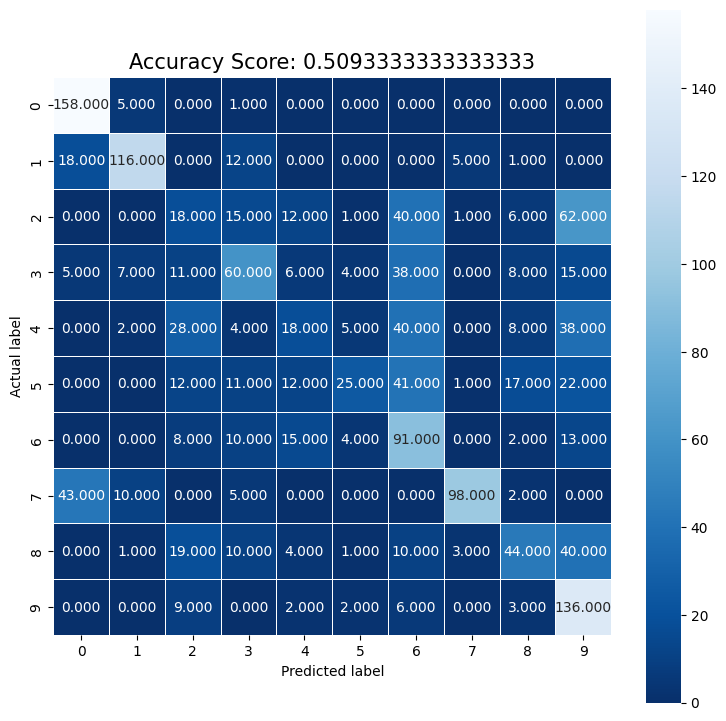

In [92]:
cm  = metrics.confusion_matrix(label_test_data,prediction_features)
print(cm)
# ploting confusion matrix to check which symbol most times classify wrongly and correctly
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

Displaying images from test dataset to check the result with predicted symbol

In [100]:
images = []
for index in np.random.choice(np.arange(0,len(label_test_data)),size=(16,)): # randomly select images from test dataset
  histog = desc.LBPfeaturesExtractor(img_test_data[index]) # feature extraction
  prediction = model.predict(histog.reshape(1,-1))
  symbol = symbols[prediction[0]]
  original_symbol = symbols[label_test_data[index]]
  image = img_test_data[index]
  color = (0,255,0)
  image = cv2.merge([image]*3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, symbol, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(image)

In [94]:
np.shape(images[1])

(96, 96, 3)

leq


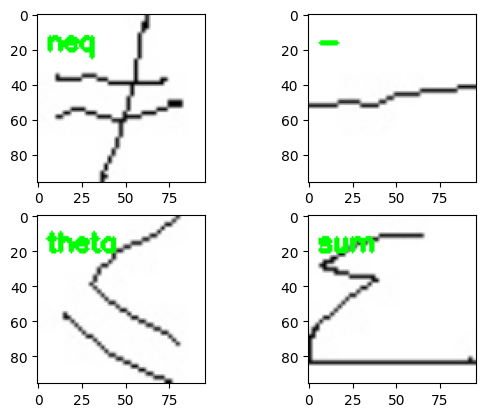

In [101]:
#plotting images with predicted symbols
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(original_symbol[:])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])

# HOG

**Training SVM classifier on training dataset**

In [102]:
train_data_arr = [] # for extracted features from training dataset
train_symbol_arr = []
#Extracting features from the training dataset using HOG
for img_index in range(len(img_train_data)):
  image = img_train_data[img_index] # loaading image from training dataset
  #extracting features of that image
  #hog method takes image for extracting feature, 6x6 pixels per cell and 3x3 cells per block. Extracting features from first block and then block moving forward untill whole image is travelled
  HOG_feature = feature.hog(image, orientations=9, pixels_per_cell=(6,6), cells_per_block=(3,3), transform_sqrt=True, block_norm="L2-Hys")
  train_data_arr.append(HOG_feature)
  train_symbol_arr.append(label_train_data[img_index])

print(np.shape(train_data_arr))
print(np.shape(train_symbol_arr))


(3500, 2025)
(3500,)


In [103]:
model = svm.SVC(kernel='rbf',C=100,gamma='auto',probability=True,random_state=42) # training a SVM classifier with training dataset
model.fit(train_data_arr,train_symbol_arr) # passing extracted features using HOG from training dataset and symbols to train the SVM

SVC(C=100, gamma='auto', probability=True, random_state=42)

In [104]:
print("Training accuracy:",model.score(train_data_arr, train_symbol_arr))

Training accuracy: 0.9971428571428571


**Evaluation of trained SVM classifier on test dataset**

In [105]:
prediction_test_arr = []
symbol_test_arr = []
data_test_arr = []
#Extracting features for all images of test dataset
for index in range(len(img_test_data)):
  image = img_test_data[index] #loading an image
  HOG_feature = feature.hog(image, orientations=9, pixels_per_cell=(6,6), cells_per_block=(3,3), transform_sqrt=True, block_norm="L2-Hys") #extracting feature
  prediction = model.predict(HOG_feature.reshape(1,-1)) #predicting symbol from the feature
  prediction_test_arr.append(prediction)
  data_test_arr.append(HOG_feature)
  symbol_test_arr.append(label_test_data[index])

print(np.shape(prediction_test_arr))
print(np.shape(symbol_test_arr))
print(np.shape(data_test_arr))

(1500, 1)
(1500,)
(1500, 2025)


In [106]:
accuracy = metrics.accuracy_score(label_test_data,prediction_test_arr)
print("test accuracy is:",accuracy)

test accuracy is: 0.9946666666666667


[[163   0   0   0   0   0   0   1   0   0]
 [  0 152   0   0   0   0   0   0   0   0]
 [  0   0 155   0   0   0   0   0   0   0]
 [  0   0   0 153   0   0   0   0   0   1]
 [  0   0   0   0 142   0   0   0   0   1]
 [  0   0   0   0   0 141   0   0   0   0]
 [  0   0   0   0   0   0 143   0   0   0]
 [  2   0   1   0   1   0   0 154   0   0]
 [  0   0   0   0   1   0   0   0 131   0]
 [  0   0   0   0   0   0   0   0   0 158]]


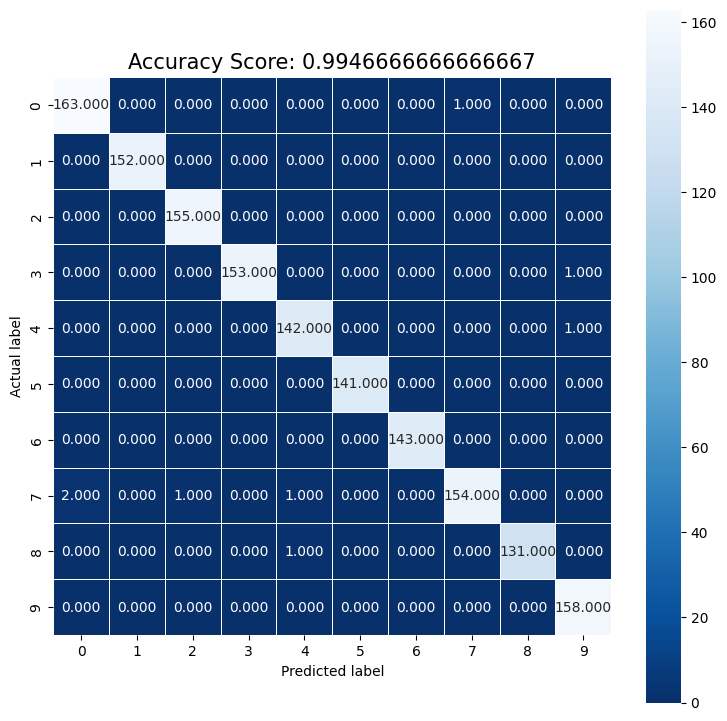

In [107]:
cm  = metrics.confusion_matrix(label_test_data,prediction_test_arr)
print(cm)
# ploting confusion matrix to check which symbol most times classify wrongly and correctly
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [108]:
images = []
orig_labels=[]
# randomly select a few testing images
for i in np.random.choice(np.arange(0, len(label_test_data)), size=(16,)):
  # classify the symbol
  test_img = (img_test_data[i])
  H1 = feature.hog(image, orientations=9, pixels_per_cell=(6,6), cells_per_block=(3,3), transform_sqrt=True, block_norm="L2-Hys")
  #pred = model.predict(H1.reshape(1, -1))
  pred = model.predict(test_img.reshape(1, -1))[0]
  label = symbols[pred]
  orig_labels.append(symbols[label_test_data[i]])
  color = (0, 255, 0)
  test_img = cv2.merge([test_img] * 3)
  test_img = cv2.resize(test_img, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(test_img, label,(5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(test_img)

In [109]:
orig_labels[1]

'alpha'

alpha
sqrt
theta
log


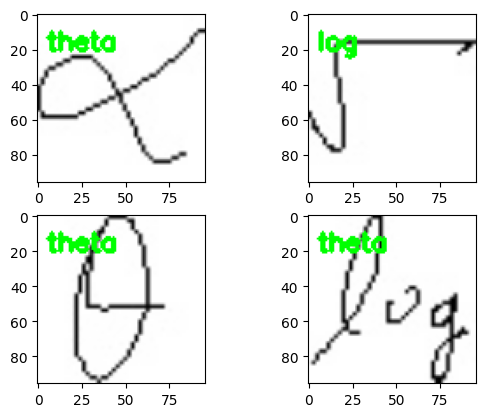

In [110]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_labels[1])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
print(orig_labels[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
print(orig_labels[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])
print(orig_labels[4])